<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/Lab8_Alexander_Del_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives
In this lab, students will learn how to:
- Use logistic regression classifier model from Scikit-learn for training and
prediction with a real dataset.
- Split dataset to training and test sets then train model with training labelled
data and predict class labels for test data.
- Evaluate performance of a classifier model using classification metrics.

> I) Dataset

> II) Lab Introduction and Useful Python

>>- Import packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display

>> - Import dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/SAheart.csv')
display(df.head())

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


>>- Plot linear correlations between the variables of interest from the dataset

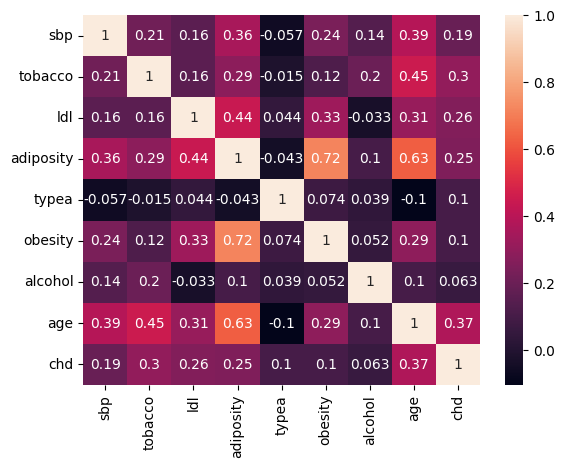

In [3]:
coor_matrix = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea','obesity', 'alcohol', 'age', 'chd']].corr()
sn.heatmap(coor_matrix, annot=True)
plt.show()

>>- In this lab, we use Sckit-learn libraries for the logistic regression model, train-test
data split, and evaluation metrics. If you’ve not yet installed scikit-learn for your
Python3 environment, you can install it easily with a command ‘pip3 install sklearn’
or ‘pip3 install scikit-learn’. You’re now can import sklearn:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

>>- Random split dataset for training sets and test sets (e.g., 80 + 20: 80% for training,
20% for testing):

In [18]:
feature_data = df[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea','obesity', 'alcohol', 'age']].values
labels = df['chd'].values
X_train, X_test, Y_train, Y_test = train_test_split(feature_data,
labels, test_size=0.20, random_state=2021)

>>- Train a logistic regression model with the training data and training labels

In [19]:
trained_lr_model = LogisticRegression().fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>>- Evaluate the trained classifier’s performance with the seen training data:

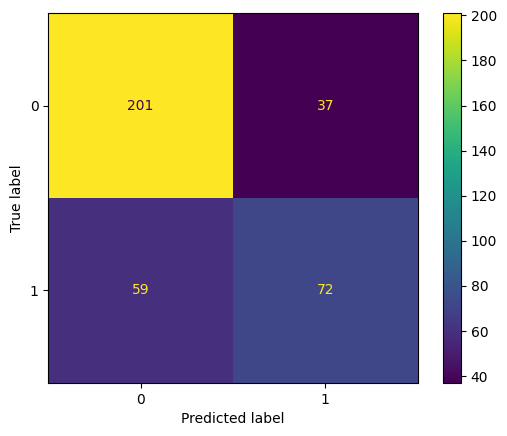

In [20]:
# predictions of label classes for the seen train data
predicted_Y_train = trained_lr_model.predict(X_train)
label_class_set = trained_lr_model.classes_

# calculate and plot confusion matrix
cm = metrics.confusion_matrix(Y_train, predicted_Y_train,
labels=label_class_set)
disp = ConfusionMatrixDisplay(cm, display_labels=label_class_set)
disp.plot()
plt.show()

0.7398373983739838
0.6605504587155964
0.549618320610687


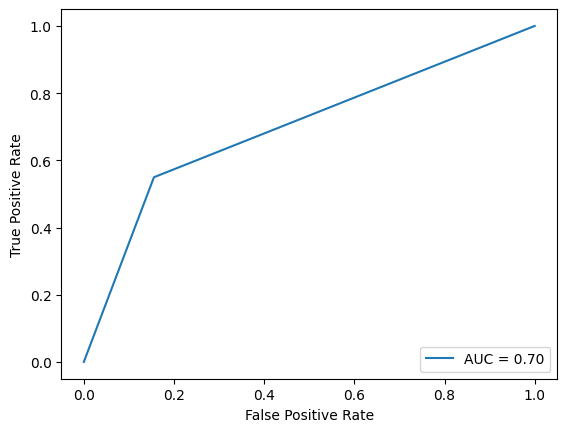

In [23]:
# calculate accuracy score
accuracy = metrics.accuracy_score(Y_train, predicted_Y_train)

# calculate accuracy score
accuracy = metrics.accuracy_score(Y_train, predicted_Y_train)
print(accuracy)

# calculate precision score
precision = precision_score(Y_train, predicted_Y_train)
print(precision)

# calculate recall score
recall = recall_score(Y_train, predicted_Y_train)
print(recall)

# calculate and plot ROC AUC curve
FPR, TPR, _ = metrics.roc_curve(Y_train, predicted_Y_train)
roc_auc = metrics.auc(FPR, TPR)
disp = metrics.RocCurveDisplay(fpr=FPR, tpr=TPR, roc_auc=roc_auc)
disp.plot()
plt.show()

>>- Evaluate the trained classifier’s performance with the unseen test data:

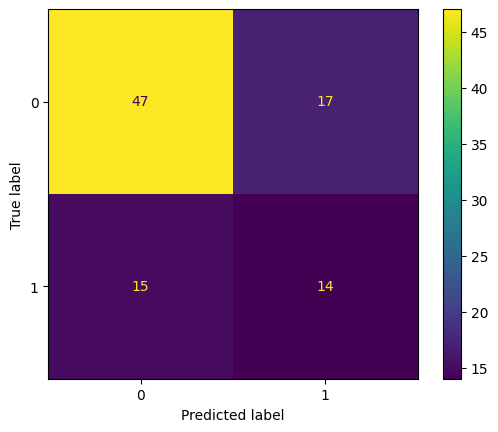

In [25]:
# predictions of label class for unseen test data
predicted_Y_test = trained_lr_model.predict(X_test)
# calculate and plot confusion matrix
cm_test = metrics.confusion_matrix(Y_test, predicted_Y_test,
labels=label_class_set)
disp = ConfusionMatrixDisplay(cm_test,display_labels=label_class_set)
disp.plot()
plt.show()

0.6559139784946236
0.45161290322580644
0.4827586206896552


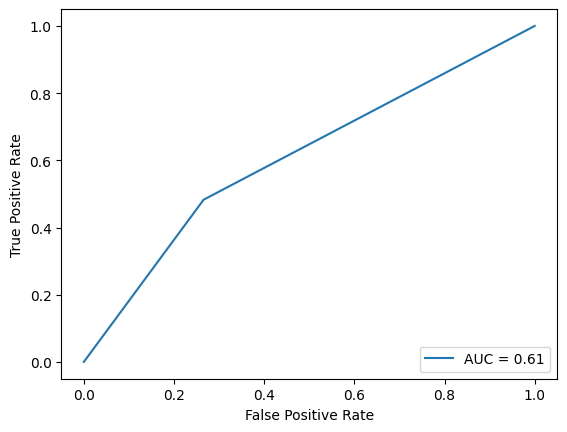

In [26]:
# calculate accuracy score
accuracy_test = metrics.accuracy_score(Y_test, predicted_Y_test)
print(accuracy_test)

# calculate precision score
precision_test = precision_score(Y_test, predicted_Y_test)
print(precision_test)

# calculate recall score
recall_test = recall_score(Y_test, predicted_Y_test)
print(recall_test)

# calculate and plot ROC AUC curve
FPR_test, TPR_test, _ = metrics.roc_curve(Y_test,
predicted_Y_test)
roc_auc_test = metrics.auc(FPR_test, TPR_test)
disp = metrics.RocCurveDisplay(fpr=FPR_test, tpr=TPR_test,
roc_auc=roc_auc_test)
disp.plot()
plt.show()

>III) Lab Procedures

>>We would like to train a simple classifier, logistic regression, to predict whether a
man has CHD positive or negative based on his health status features (sbp, tobacco,
idl, adiposity, typea, obesity, alcohol, age).

>1) Download dataset: link download

>2) Start a Jupyter notebook, rename the notebook file to:
“lab8_{your first name}_{your last name}”

>3) Follow the lab introduction, calculate and plot a linear correlation matrix between
variables of interest.

>4) Follow the lab introduction, using Scikit-learn, import logistic regression classifier
model, train-test split, and evaluation metrics. Random split dataset into training
dataset (80%) and testing dataset (20%). Train your logistic regression model with
the training dataset.

>5) Evaluate training performance of the trained classifier with the seen training
dataset.

>6) Evaluate testing performance of the trained classifier with the unseen testing
dataset.